In [17]:
import pandas as pd

file_path = '../data/04_(문제)_회귀모델_drinking_water.csv'
df = pd.read_csv(file_path)
df

,친밀도,적절성,만족도
0,3,4,3
1,3,3,2
2,4,4,4
3,2,2,2
4,2,2,2
...,...,...,...
259,3,4,4
260,3,4,3
261,4,4,4
262,4,4,4


In [11]:
df['만족도'].unique()

array([3, 2, 4, 5, 1], dtype=int64)

In [19]:
df_data = df[['친밀도', '적절성']]

In [20]:
df_target = df['만족도']

In [27]:
import matplotlib.pyplot as plt

## 다중회귀분석

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [21]:
# 데이터프레임을 2차원 배열로 바꾸기
df_n = df_data.to_numpy()
df_n

array([[3, 4],
       [3, 3],
       [4, 4],
       [2, 2],
       [2, 2],
       [3, 3],
       [4, 4],
       [2, 2],
       [3, 2],
       [4, 2],
       [5, 5],
       [4, 4],
       [1, 1],
       [3, 2],
       [2, 2],
       [2, 2],
       [3, 3],
       [2, 3],
       [3, 3],
       [4, 4],
       [3, 2],
       [3, 4],
       [2, 3],
       [4, 4],
       [4, 3],
       [3, 2],
       [2, 3],
       [4, 3],
       [3, 2],
       [3, 2],
       [3, 3],
       [2, 3],
       [3, 4],
       [3, 2],
       [3, 4],
       [3, 1],
       [2, 3],
       [3, 3],
       [4, 4],
       [3, 3],
       [3, 3],
       [3, 3],
       [2, 3],
       [3, 2],
       [3, 3],
       [3, 4],
       [4, 3],
       [3, 3],
       [3, 3],
       [3, 2],
       [2, 3],
       [4, 3],
       [3, 3],
       [3, 3],
       [2, 1],
       [4, 3],
       [3, 4],
       [3, 4],
       [4, 5],
       [3, 3],
       [2, 3],
       [4, 4],
       [3, 3],
       [3, 3],
       [3, 3],
       [3, 3],
       [3,

In [23]:
# 데이터 분리
train_data, test_data, train_target, test_target = train_test_split(df_n, df_target)

In [24]:
print(train_data.shape)
print(train_target.shape)
print(test_data.shape)
print(test_target.shape)

(198, 2)
(198,)
(66, 2)
(66,)


In [25]:
# 특성 생성
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_data)
poly.fit(test_data)

train_poly = poly.transform(train_data)
test_poly = poly.transform(test_data)

poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [35]:
lr1 = LinearRegression()

lr1.fit(train_poly, train_target)
print('훈련 = ', lr1.score(train_poly, train_target))
print('테스트 = ', lr1.score(test_poly, test_target))

훈련 =  0.6541278055650137
테스트 =  0.5808975478161358


In [ ]:
'''
과대적합
'''

In [65]:
# 특성 생성
poly = PolynomialFeatures(degree = 5, include_bias=False)

poly.fit(train_data)
poly.fit(test_data)

train_poly = poly.transform(train_data)
test_poly = poly.transform(test_data)

poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5',
       'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5'],
      dtype=object)

In [66]:
# 훈련 결정계수가 가장 높아지는 차수 설정
lr2 = LinearRegression()

lr2.fit(train_poly, train_target)
print('훈련 = ', lr2.score(train_poly, train_target))
print('테스트 = ', lr2.score(test_poly, test_target))

훈련 =  0.6775376594793987
테스트 =  -9.081823789613257


In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [68]:
ss = StandardScaler()
ss.fit(train_poly, train_target)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

print(ss.mean_, ss.scale_)

[  2.93434343   3.13636364   9.5          9.67171717  10.61111111
  32.72222222  32.6010101   33.99494949  38.01515152 118.04545455
 116.36868687 118.6010101  125.76262626 142.67171717 442.78282828
 433.99494949 437.05555556 452.51010101 485.57070707 556.92424242] [  0.94320126   0.87996264   5.27213947   5.00588624   5.48416248
  25.47069243  24.83800849  25.32884679  28.35391005 120.29376062
 118.14073284 119.5832722  124.34165712 139.97250202 569.05436206
 561.25045722 564.86840511 579.03378018 606.18138479 683.81966383]


In [69]:
# 릿지모델
ridge = Ridge()
ridge.fit(train_scaled, train_target)

print('훈련 = ', ridge.score(train_scaled, train_target))
print('테스트 = ', ridge.score(test_scaled, test_target))

훈련 =  0.6532533369895203
테스트 =  0.592139434517909


In [70]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)

print('훈련 = ', lasso.score(train_scaled, train_target))
print('테스트 = ', lasso.score(test_scaled, test_target))

훈련 =  0.0
테스트 =  -0.010984182776801577


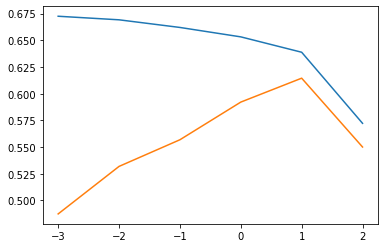

In [72]:
# 훈련시 발생하는 결정계수를 저장
train_score = []

# 테스트시 발생하는 결정계수를 저장
test_score = []


## 2. 임의의 alpha값 설정(범위 설정)
# 이때, 알파값은 x축으로 설정한다
alpha_list = [0.001, 0.01, 0.1 , 1, 10, 100]


## 3. 훈련 및 테스트 결정계수 데이터 조회
for alpha in alpha_list :
    # 릿지모델
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
    
    
plt.plot(np.log10(alpha_list), train_score) # blue
plt.plot(np.log10(alpha_list), test_score)  # orange

In [73]:
ridge = Ridge(alpha = 10)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.6388475337560506
0.6145474178981807


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.851e-01, tolerance: 1.459e-02
  model = cd_fast.enet_coordinate_descent(


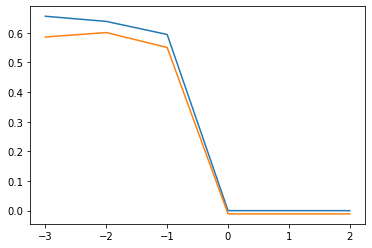

In [74]:
# 훈련시 발생하는 결정계수를 저장
train_score = []

# 테스트시 발생하는 결정계수를 저장
test_score = []


## 2. 임의의 alpha값 설정(범위 설정)
# 이때, 알파값은 x축으로 설정한다
alpha_list = [0.001, 0.01, 0.1 , 1, 10, 100]


## 3. 훈련 및 테스트 결정계수 데이터 조회
for alpha in alpha_list :
    # 라쏘모델
    lasso = Lasso(alpha = alpha)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
    
    
plt.plot(np.log10(alpha_list), train_score) # blue
plt.plot(np.log10(alpha_list), test_score)  # orange

In [77]:
lasso = Lasso(alpha = 0.01)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.6383385703244917
0.6006863705379715


In [ ]:
'''
계속해서 과소적합으로 나오기때문에 다른데이터 요청 가능
'''